In [1]:
# Load a molecule into the OpenFF Molecule object
from openff.toolkit.topology import Molecule
molecule = Molecule.from_file('triazine.sdf')

# Create an OpenFF Topology object from the molecule
from openff.toolkit.topology import Topology
topology = Topology.from_molecules(molecule)

# Load the latest OpenFF force field release: version 2.0.0, codename "Sage"
from openff.toolkit.typing.engines.smirnoff import ForceField
forcefield = ForceField('openff-2.0.0.offxml')

# Create an OpenMM system representing the molecule with SMIRNOFF-applied parameters
openmm_system = forcefield.create_openmm_system(topology)

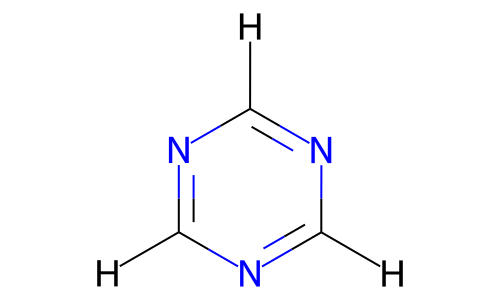

In [2]:
molecule

In [3]:
import parmed

# Convert OpenMM System to a ParmEd structure.
parmed_structure = parmed.openmm.load_topology(
    topology.to_openmm(), openmm_system, molecule.conformers[0]
)

In [ ]:
# Export AMBER files.
parmed_structure.save("system.prmtop", overwrite=True)
parmed_structure.save("system.inpcrd", overwrite=True)

# Error converting via parmed to prmtop, related to ParmEd #930 #603
# https://github.com/openforcefield/openff-toolkit/issues/603

In [5]:
# Export GROMACS files.
parmed_structure.save("system.top", overwrite=True)
parmed_structure.save("system.pdb", overwrite=True)